### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [214]:
import pandas as pd

In [215]:
df=pd.read_csv('exide.csv')

In [216]:
df = df[['Close']]
df

Close
0       3.382028
1       3.404727
2       3.404727
3       3.404727
4       3.397159
...          ...
4773  154.199997
4774  153.449997
4775  151.850006
4776  151.449997
4777  152.500000

[4778 rows x 1 columns]

In [217]:
# df = df.set_index(['Date'])
# df

In [120]:
# df.to_csv('stock.csv')

In [88]:
# df1=df.reset_index()['Close']
# df = pd.DataFrame(df1)
# df

In [270]:
# df1 = pd.read_csv('stock.csv',index_col=0,parse_dates=True)#,squeeze=True)
# df1

In [218]:
# df1=df1['Close'].resample('M').mean()
# df1

In [219]:
df1=df

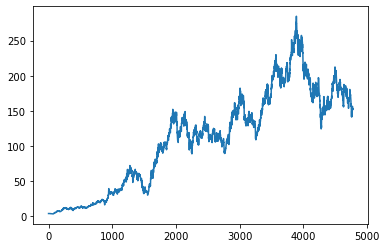

In [220]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [176]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [221]:
import numpy as np

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [224]:
print(df1.shape)

(4778, 1)


In [229]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [230]:
training_size,test_size

(3822, 956)

In [231]:
train_data.shape
test_data.shape

(956, 1)

In [232]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        print(a)
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [233]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

[1.93241211e-03 2.01293087e-03 2.01293087e-03 2.01293087e-03
 1.98608536e-03 2.01293087e-03 2.14712541e-03 1.98608536e-03
 1.98608536e-03 1.98608536e-03 1.98608536e-03 2.14712541e-03
 2.03977045e-03 2.01293087e-03 2.01293087e-03 2.01293087e-03
 1.98608536e-03 2.30816293e-03 2.03977045e-03 2.03977045e-03
 1.98608536e-03 1.98608536e-03 1.98608536e-03 1.87873379e-03
 1.90557506e-03 1.85189758e-03 1.85189758e-03 1.87873379e-03
 1.69086091e-03 1.39563308e-03 1.12724146e-03 1.12724146e-03
 1.07356228e-03 1.23459726e-03 1.18091894e-03 1.28827390e-03
 1.42247013e-03 1.34195391e-03 1.28827390e-03 1.20775514e-03
 1.31511433e-03 1.15408020e-03 1.10040272e-03 1.23459726e-03
 1.10040272e-03 1.07356228e-03 1.04672270e-03 8.05174039e-04
 7.24654436e-04 9.39367739e-04 8.32010242e-04 7.24654436e-04
 7.24654436e-04 4.29427451e-04 4.29427451e-04 3.48908694e-04
 5.36780719e-04 5.90462428e-04 5.36780719e-04 4.02589557e-04
 4.02589557e-04 4.02589557e-04 2.41554580e-04 0.00000000e+00
 2.68404314e-05 5.368086

 8.91056061e-03 8.88372357e-03 1.01451528e-02 1.13582953e-02]
[1.23459726e-03 1.18091894e-03 1.28827390e-03 1.42247013e-03
 1.34195391e-03 1.28827390e-03 1.20775514e-03 1.31511433e-03
 1.15408020e-03 1.10040272e-03 1.23459726e-03 1.10040272e-03
 1.07356228e-03 1.04672270e-03 8.05174039e-04 7.24654436e-04
 9.39367739e-04 8.32010242e-04 7.24654436e-04 7.24654436e-04
 4.29427451e-04 4.29427451e-04 3.48908694e-04 5.36780719e-04
 5.90462428e-04 5.36780719e-04 4.02589557e-04 4.02589557e-04
 4.02589557e-04 2.41554580e-04 0.00000000e+00 2.68404314e-05
 5.36808629e-05 2.41554580e-04 5.36780719e-04 5.36780719e-04
 3.75749125e-04 3.75749125e-04 2.68391628e-04 3.22068262e-04
 3.22068262e-04 3.22068262e-04 1.87875408e-04 2.41554580e-04
 2.41554580e-04 4.83104085e-04 5.63621151e-04 1.36879011e-03
 1.36879011e-03 2.65706655e-03 3.67695135e-03 3.11332682e-03
 3.35488055e-03 3.35488055e-03 3.35488055e-03 3.19384896e-03
 3.14016556e-03 3.48907763e-03 3.99901792e-03 4.61631317e-03
 4.91154608e-03 5.55568

[0.00032207 0.00032207 0.00018788 0.00024155 0.00024155 0.0004831
 0.00056362 0.00136879 0.00136879 0.00265707 0.00367695 0.00311333
 0.00335488 0.00335488 0.00335488 0.00319385 0.00314017 0.00348908
 0.00399902 0.00461631 0.00491155 0.00555568 0.00585091 0.00552884
 0.00534097 0.00590459 0.00595827 0.00587775 0.00713919 0.00772964
 0.00805171 0.00789068 0.00759545 0.00746125 0.00764913 0.00762229
 0.00767597 0.00740758 0.00711235 0.00662924 0.00711235 0.00668292
 0.00719287 0.00786384 0.0088032  0.00917895 0.00896424 0.00858849
 0.00837378 0.00861533 0.00858849 0.00850798 0.00869585 0.00858849
 0.00850798 0.00891056 0.00888372 0.01014515 0.0113583  0.01268172
 0.01320557 0.01383972 0.01334343 0.01312287 0.013757   0.014722
 0.013178   0.01466686 0.01444629 0.01485986 0.01474958 0.01419814
 0.01485986 0.01483229 0.01483229 0.01447386 0.01455657 0.014722
 0.014722   0.014529   0.01508043 0.01483229 0.01516314 0.01546643
 0.01563185 0.01538372 0.015301   0.01527342 0.01502529 0.01502529


 0.02889367 0.02889367 0.02883853 0.02919696]
[0.014722   0.014529   0.01508043 0.01483229 0.01516314 0.01546643
 0.01563185 0.01538372 0.015301   0.01527342 0.01502529 0.01502529
 0.01502529 0.01494258 0.01417057 0.01326072 0.01287472 0.013178
 0.01339858 0.01353643 0.01326072 0.01273686 0.01281958 0.01221301
 0.01268172 0.01221301 0.01224058 0.01235087 0.01210272 0.01171673
 0.01213029 0.01199243 0.01163402 0.01188215 0.01202001 0.01199243
 0.01202001 0.01246115 0.01257144 0.01259901 0.01262658 0.01284715
 0.01304015 0.01328829 0.01367429 0.01367429 0.01406029 0.01450143
 0.015108   0.01541128 0.015301   0.01535615 0.01662442 0.01723099
 0.0184717  0.02007085 0.02045684 0.02070497 0.01869228 0.01745156
 0.01838899 0.01949185 0.01918855 0.01883013 0.01819599 0.0192437
 0.02147698 0.02114613 0.01971242 0.02045684 0.02015355 0.02020869
 0.02304855 0.02583326 0.0260814  0.02580568 0.0260814  0.02803896
 0.02759782 0.02583326 0.02467525 0.02442711 0.02721182 0.0262744
 0.0262744  0.025778

 0.02616411 0.02519912 0.02528183 0.02495097]
[0.01949185 0.01918855 0.01883013 0.01819599 0.0192437  0.02147698
 0.02114613 0.01971242 0.02045684 0.02015355 0.02020869 0.02304855
 0.02583326 0.0260814  0.02580568 0.0260814  0.02803896 0.02759782
 0.02583326 0.02467525 0.02442711 0.02721182 0.0262744  0.0262744
 0.02577811 0.02508883 0.02701882 0.02875583 0.02961053 0.02941753
 0.02864553 0.02859039 0.0298311  0.02892125 0.02889367 0.02889367
 0.02883853 0.02919696 0.02820438 0.02776324 0.03101666 0.03087882
 0.02999653 0.02991381 0.02991381 0.02985866 0.02969323 0.02916939
 0.02859039 0.02914182 0.03021709 0.03112695 0.03112695 0.02994139
 0.03018953 0.03052039 0.03074095 0.03024466 0.03195409 0.03098909
 0.03104423 0.0300241  0.03018953 0.02958296 0.02817681 0.02682582
 0.02682582 0.02732211 0.02798381 0.02831467 0.02602625 0.02602625
 0.02497854 0.02583326 0.02619167 0.0265501  0.02726696 0.02657768
 0.02762538 0.02757025 0.02754268 0.02759782 0.02743239 0.02773567
 0.02762538 0.026

 0.02335182 0.02288312 0.02318641 0.02246955]
[0.02732211 0.02798381 0.02831467 0.02602625 0.02602625 0.02497854
 0.02583326 0.02619167 0.0265501  0.02726696 0.02657768 0.02762538
 0.02757025 0.02754268 0.02759782 0.02743239 0.02773567 0.02762538
 0.02638469 0.02591597 0.02649496 0.02588839 0.02575053 0.0263571
 0.02475797 0.02475797 0.02533696 0.0262744  0.02616411 0.02519912
 0.02528183 0.02495097 0.02431683 0.0247304  0.02332426 0.02178027
 0.02246955 0.02274526 0.02390325 0.02387569 0.02359997 0.02439954
 0.02462011 0.02456498 0.0247304  0.02467525 0.02555754 0.02853524
 0.02831467 0.02836981 0.02765296 0.02814925 0.02754268 0.02754268
 0.02729453 0.0284801  0.0284801  0.02914182 0.0300241  0.03115452
 0.03143023 0.03167837 0.03137509 0.03231252 0.03231252 0.03211952
 0.03269851 0.0330018  0.03264337 0.03156809 0.0318438  0.03187138
 0.03206438 0.03220223 0.03143023 0.02790111 0.02798381 0.02845253
 0.02470281 0.02219383 0.02404111 0.02613653 0.02646739 0.02646739
 0.02734967 0.027

 0.03157172 0.03242609 0.03254001 0.03214131]
[0.03264337 0.03156809 0.0318438  0.03187138 0.03206438 0.03220223
 0.03143023 0.02790111 0.02798381 0.02845253 0.02470281 0.02219383
 0.02404111 0.02613653 0.02646739 0.02646739 0.02734967 0.02737725
 0.02897639 0.02911425 0.02770809 0.02431683 0.02274526 0.02398597
 0.02337941 0.02302098 0.02246955 0.02335182 0.02288312 0.02318641
 0.02246955 0.02144941 0.0219457  0.0205947  0.02020869 0.02015355
 0.01935399 0.01860956 0.01723099 0.01797542 0.01880256 0.02076013
 0.02125641 0.02084283 0.0221387  0.0245374  0.02442348 0.02348367
 0.02334129 0.02231604 0.02379694 0.02411022 0.02496459 0.02610375
 0.02559113 0.02573352 0.02542024 0.02556264 0.0264455  0.02798336
 0.02729986 0.02715747 0.02695812 0.02675876 0.02598983 0.0268442
 0.02727139 0.02718595 0.02789793 0.02741378 0.02835359 0.02852447
 0.03071735 0.02903709 0.0287523  0.02858142 0.02804032 0.02841055
 0.02789793 0.02886621 0.02812576 0.02707203 0.02744227 0.0273853
 0.02841055 0.0286

 0.03370765 0.03291024 0.03245457 0.03254001]
[0.0264455  0.02798336 0.02729986 0.02715747 0.02695812 0.02675876
 0.02598983 0.0268442  0.02727139 0.02718595 0.02789793 0.02741378
 0.02835359 0.02852447 0.03071735 0.02903709 0.0287523  0.02858142
 0.02804032 0.02841055 0.02789793 0.02886621 0.02812576 0.02707203
 0.02744227 0.0273853  0.02841055 0.02866686 0.03054648 0.03265392
 0.03279632 0.03308111 0.03248305 0.03188498 0.03245457 0.0314578
 0.03165716 0.03157172 0.03242609 0.03254001 0.03214131 0.0319989
 0.03268241 0.03322351 0.03296719 0.03339439 0.03316655 0.03350829
 0.03370765 0.035274   0.03467594 0.03407788 0.03376461 0.03422027
 0.03456203 0.03396396 0.03507464 0.03422027 0.03393549 0.03299568
 0.03299568 0.03271088 0.03236913 0.03285329 0.03265392 0.03282479
 0.03268241 0.03268241 0.03242609 0.03262545 0.0312015  0.03288175
 0.03177107 0.03177107 0.03165716 0.0317426  0.03162868 0.03236913
 0.03162868 0.03046104 0.03128694 0.03151477 0.03142932 0.03142932
 0.0316002  0.0312

 0.03268241 0.0325685  0.03125845 0.03171412]
[0.03456203 0.03396396 0.03507464 0.03422027 0.03393549 0.03299568
 0.03299568 0.03271088 0.03236913 0.03285329 0.03265392 0.03282479
 0.03268241 0.03268241 0.03242609 0.03262545 0.0312015  0.03288175
 0.03177107 0.03177107 0.03165716 0.0317426  0.03162868 0.03236913
 0.03162868 0.03046104 0.03128694 0.03151477 0.03142932 0.03142932
 0.0316002  0.03125845 0.0314578  0.03165716 0.03122998 0.03122998
 0.03273936 0.03478985 0.03478985 0.03564422 0.03441963 0.03370765
 0.03291024 0.03245457 0.03254001 0.03490377 0.0373245  0.03689731
 0.03809342 0.03897628 0.03846364 0.038663   0.03857758 0.03775168
 0.0392041  0.03914714 0.03806494 0.03809342 0.03752385 0.03760928
 0.03723905 0.03715361 0.03698275 0.03695426 0.0373245  0.03783712
 0.03607141 0.03478985 0.03510313 0.03587205 0.035274   0.03345134
 0.03436267 0.03154325 0.03134389 0.03179955 0.03234066 0.03048952
 0.03179955 0.03137237 0.03245457 0.03302415 0.03299568 0.03316655
 0.03345134 0.03

 0.03011928 0.03009081 0.03071735 0.03128694]
[0.03809342 0.03897628 0.03846364 0.038663   0.03857758 0.03775168
 0.0392041  0.03914714 0.03806494 0.03809342 0.03752385 0.03760928
 0.03723905 0.03715361 0.03698275 0.03695426 0.0373245  0.03783712
 0.03607141 0.03478985 0.03510313 0.03587205 0.035274   0.03345134
 0.03436267 0.03154325 0.03134389 0.03179955 0.03234066 0.03048952
 0.03179955 0.03137237 0.03245457 0.03302415 0.03299568 0.03316655
 0.03345134 0.03345134 0.03382157 0.03339439 0.03347981 0.03521704
 0.03544486 0.03419179 0.0340494  0.03322351 0.03268241 0.03268241
 0.0325685  0.03125845 0.03171412 0.03168563 0.03162868 0.03140085
 0.03649859 0.03538792 0.03535943 0.03524552 0.0347329  0.03490377
 0.03561575 0.03478985 0.03407788 0.03379308 0.03302415 0.03339439
 0.033907   0.03333742 0.03202739 0.03216978 0.03048952 0.02937884
 0.02880926 0.02863837 0.02829663 0.02969211 0.03094518 0.03211283
 0.03185652 0.03171412 0.03148627 0.03122998 0.03060343 0.02997689
 0.03023321 0.02

 0.04231829 0.041914   0.04179847 0.04292469]
[0.03561575 0.03478985 0.03407788 0.03379308 0.03302415 0.03339439
 0.033907   0.03333742 0.03202739 0.03216978 0.03048952 0.02937884
 0.02880926 0.02863837 0.02829663 0.02969211 0.03094518 0.03211283
 0.03185652 0.03171412 0.03148627 0.03122998 0.03060343 0.02997689
 0.03023321 0.02980602 0.02980602 0.03043256 0.03131541 0.0316002
 0.03305264 0.03265392 0.03216978 0.03182803 0.03111606 0.03011928
 0.03009081 0.03071735 0.03128694 0.0314578  0.03179955 0.03214131
 0.03550182 0.03444811 0.03433419 0.03399245 0.03467594 0.03424876
 0.0345905  0.03387853 0.03510313 0.03584358 0.03709665 0.03726754
 0.03721057 0.03721057 0.03692578 0.03721057 0.03795103 0.03749536
 0.03792255 0.03803646 0.03914714 0.03985913 0.04017239 0.04020087
 0.03914714 0.03877692 0.03852062 0.03940346 0.03965977 0.03894778
 0.03923259 0.03834973 0.03889084 0.03871997 0.03926105 0.03883387
 0.03849212 0.03923259 0.03815039 0.03880539 0.0393465  0.0392041
 0.03863452 0.0386

 0.05204982 0.05222308 0.05251186 0.05233861]
[0.03871997 0.03926105 0.03883387 0.03849212 0.03923259 0.03815039
 0.03880539 0.0393465  0.0392041  0.03863452 0.038663   0.03931803
 0.03997304 0.03960281 0.03985913 0.03985913 0.04213746 0.04361837
 0.04190961 0.04159636 0.04231829 0.041914   0.04179847 0.04292469
 0.04950866 0.04950866 0.04592789 0.04549474 0.04653434 0.04535035
 0.04708298 0.04610115 0.04587015 0.04581239 0.04546586 0.04601452
 0.04549474 0.04477283 0.04546586 0.04500384 0.04641881 0.04509047
 0.04509047 0.04514823 0.04537925 0.04509047 0.04503271 0.04509047
 0.04584127 0.04656319 0.04670759 0.04688083 0.05646801 0.05277176
 0.05043269 0.05150117 0.05054822 0.05101025 0.05158778 0.05277176
 0.05239634 0.05083699 0.04820919 0.04520597 0.0474295  0.04881562
 0.05077924 0.05072148 0.04927763 0.05083699 0.05092361 0.05352256
 0.05210757 0.05124126 0.04988404 0.05060597 0.05057709 0.04997068
 0.04999955 0.04881562 0.04942201 0.04771827 0.04913326 0.0510969
 0.04939314 0.051

 0.0567279  0.05817174 0.05617925 0.0560926 ]
[0.04927763 0.05083699 0.05092361 0.05352256 0.05210757 0.05124126
 0.04988404 0.05060597 0.05057709 0.04997068 0.04999955 0.04881562
 0.04942201 0.04771827 0.04913326 0.0510969  0.04939314 0.05106802
 0.05202096 0.05017284 0.05072148 0.05077924 0.05158778 0.05158778
 0.05204982 0.05138565 0.05077924 0.05204982 0.05222308 0.05251186
 0.05233861 0.05239634 0.05233861 0.05239634 0.05236747 0.05332043
 0.05225197 0.05282952 0.05355143 0.05239634 0.05317603 0.05846051
 0.0606552  0.06149262 0.05941345 0.05926908 0.05898032 0.06004875
 0.05892255 0.05701668 0.05698779 0.05554395 0.05615036 0.05817174
 0.05869156 0.06082844 0.06302308 0.06371613 0.06412042 0.06484234
 0.06530438 0.06683487 0.0660263  0.06510224 0.06669047 0.06599744
 0.0658819  0.0658819  0.06570865 0.06487123 0.06498676 0.06360064
 0.06406266 0.06258992 0.06071293 0.06230117 0.06068405 0.05976
 0.05929795 0.05935573 0.0608573  0.06100169 0.05981775 0.05912469
 0.05999101 0.06100

 0.07113753 0.07151295 0.07035785 0.07200386]
[0.05701668 0.05698779 0.05554395 0.05615036 0.05817174 0.05869156
 0.06082844 0.06302308 0.06371613 0.06412042 0.06484234 0.06530438
 0.06683487 0.0660263  0.06510224 0.06669047 0.06599744 0.0658819
 0.0658819  0.06570865 0.06487123 0.06498676 0.06360064 0.06406266
 0.06258992 0.06071293 0.06230117 0.06068405 0.05976    0.05929795
 0.05935573 0.0608573  0.06100169 0.05981775 0.05912469 0.05999101
 0.06100169 0.06218566 0.06103058 0.06131934 0.06247446 0.06114609
 0.06126159 0.06230117 0.06100169 0.05976    0.0567279  0.05817174
 0.05617925 0.0560926  0.063514   0.06100169 0.0596156  0.06071293
 0.05970224 0.05926908 0.0606552  0.06068405 0.06068405 0.06036641
 0.06071293 0.06103058 0.061637   0.06360064 0.06374501 0.06426482
 0.06498676 0.06527548 0.06848086 0.06747016 0.06784555 0.06689262
 0.06732577 0.0672969  0.06617069 0.06807656 0.06822096 0.06952042
 0.07035785 0.07275464 0.07350546 0.07416961 0.07402522 0.07405411
 0.07125305 0.071

 0.0597806  0.059459   0.05846497 0.05948826]
[0.06100169 0.0596156  0.06071293 0.05970224 0.05926908 0.0606552
 0.06068405 0.06068405 0.06036641 0.06071293 0.06103058 0.061637
 0.06360064 0.06374501 0.06426482 0.06498676 0.06527548 0.06848086
 0.06747016 0.06784555 0.06689262 0.06732577 0.0672969  0.06617069
 0.06807656 0.06822096 0.06952042 0.07035785 0.07275464 0.07350546
 0.07416961 0.07402522 0.07405411 0.07125305 0.07174395 0.07185948
 0.07110866 0.06989582 0.06975143 0.06995356 0.06952042 0.06937603
 0.06937603 0.07093539 0.07113753 0.07151295 0.07035785 0.07200386
 0.07087766 0.06946268 0.06732577 0.06747016 0.07044447 0.06845198
 0.06871187 0.06516    0.06475572 0.06634394 0.06536213 0.0657664
 0.06709475 0.06565091 0.06446695 0.0638894  0.06198353 0.06403378
 0.0607418  0.05716105 0.05187656 0.05262739 0.05106802 0.04581239
 0.04789152 0.04913326 0.06097283 0.06426482 0.06302308 0.06412042
 0.06406266 0.06567976 0.06466908 0.06409154 0.0638894  0.06282096
 0.06253218 0.062936

 0.10424882 0.10454125 0.10410266 0.10103283]
[0.06709475 0.06565091 0.06446695 0.0638894  0.06198353 0.06403378
 0.0607418  0.05716105 0.05187656 0.05262739 0.05106802 0.04581239
 0.04789152 0.04913326 0.06097283 0.06426482 0.06302308 0.06412042
 0.06406266 0.06567976 0.06466908 0.06409154 0.0638894  0.06282096
 0.06253218 0.06293646 0.06230117 0.06209901 0.06230117 0.06123272
 0.06126159 0.06045304 0.06086236 0.0620318  0.06133013 0.0597806
 0.059459   0.05846497 0.05948826 0.06691423 0.06787904 0.06989631
 0.06925311 0.07059799 0.07059799 0.0685807  0.0683468  0.07024714
 0.07179666 0.07261529 0.0768253  0.07779008 0.07732231 0.07653293
 0.07746852 0.07933959 0.07960273 0.07989511 0.0795735  0.07971969
 0.07948579 0.08112303 0.08164927 0.08045057 0.08384197 0.08650245
 0.09612117 0.09252512 0.09331452 0.09255434 0.09234971 0.09468863
 0.10258239 0.1220829  0.12354472 0.12807632 0.12398326 0.1236909
 0.11828221 0.11170407 0.11228877 0.11243494 0.10994987 0.10921898
 0.106003   0.1067

 0.10769869 0.10755256 0.10840038 0.10825421]
[0.09234971 0.09468863 0.10258239 0.1220829  0.12354472 0.12807632
 0.12398326 0.1236909  0.11828221 0.11170407 0.11228877 0.11243494
 0.10994987 0.10921898 0.106003   0.10673392 0.10614919 0.10702629
 0.10658776 0.10658776 0.10366412 0.10410266 0.10366412 0.1052721
 0.10629538 0.10424882 0.10454125 0.10410266 0.10103283 0.10234849
 0.10161759 0.11258111 0.10863422 0.10892661 0.10878048 0.10892661
 0.10921898 0.1115579  0.11214259 0.11126555 0.11009607 0.11126555
 0.11038844 0.10614919 0.10790336 0.10819571 0.10819571 0.10761097
 0.11126555 0.10848808 0.10571064 0.10264083 0.10264083 0.10907282
 0.10644155 0.10614919 0.1052721  0.10717247 0.10921898 0.106003
 0.10614919 0.10658776 0.10541829 0.10410266 0.10410266 0.10307939
 0.10088668 0.09957104 0.10015579 0.10220233 0.1019099  0.09699827
 0.09574107 0.09474705 0.09460089 0.09474705 0.09559494 0.09585807
 0.09460089 0.09404542 0.0944547  0.09474705 0.10036044 0.09951256
 0.10234849 0.10585

 0.11936393 0.11822375 0.12091343 0.12301846]
[0.09474705 0.09559494 0.09585807 0.09460089 0.09404542 0.0944547
 0.09474705 0.10036044 0.09951256 0.10234849 0.10585684 0.10641234
 0.10430731 0.10500896 0.10474585 0.10500896 0.11050537 0.11372138
 0.10769869 0.110213   0.10769869 0.10755256 0.10840038 0.10825421
 0.11696657 0.12567895 0.12331086 0.12316463 0.11977327 0.12246299
 0.12512345 0.12161514 0.11810678 0.11456924 0.11372138 0.12342777
 0.12105965 0.11965631 0.12415868 0.12357395 0.11822375 0.11822375
 0.12202447 0.12091343 0.11822375 0.12176131 0.11936393 0.11655725
 0.11456924 0.11527084 0.11401372 0.11527084 0.11430609 0.11316584
 0.11176252 0.10851735 0.10994987 0.11135325 0.11120706 0.11372138
 0.11261036 0.11076851 0.10951133 0.11076851 0.10951133 0.10024349
 0.10769869 0.10685085 0.10755256 0.10810798 0.10840038 0.10980372
 0.10851735 0.10965754 0.11415989 0.11316584 0.11345822 0.11655725
 0.11810678 0.1262637  0.12246299 0.12035797 0.11246421 0.11106088
 0.11246421 0.112

 0.16401795 0.16416527 0.17267935 0.17267935]
[0.11345822 0.11655725 0.11810678 0.1262637  0.12246299 0.12035797
 0.11246421 0.11106088 0.11246421 0.11220109 0.112318   0.11316584
 0.11106088 0.11076851 0.11065159 0.11500771 0.11936393 0.11810678
 0.12120579 0.11936393 0.11822375 0.12091343 0.12301846 0.11991941
 0.1190716  0.11822375 0.11781444 0.11655725 0.11740511 0.12486032
 0.12357395 0.12062115 0.11965631 0.12120579 0.12190746 0.12456801
 0.12836869 0.12316463 0.12047493 0.12047493 0.12120579 0.11977327
 0.12006561 0.12006561 0.12047493 0.11880845 0.12062115 0.1223168
 0.12006561 0.12006561 0.12582516 0.12991819 0.12781322 0.12836869
 0.12711156 0.12567895 0.12640986 0.12427563 0.12348021 0.12601381
 0.12433456 0.12403992 0.12076983 0.12162421 0.1231856  0.14404366
 0.14828599 0.14772625 0.14501589 0.14501589 0.14077353 0.14118602
 0.14757894 0.13991919 0.14486859 0.15509141 0.15297023 0.15070179
 0.15282293 0.14914035 0.14587026 0.15267562 0.14843331 0.14516319
 0.14318933 0.146

 0.20146233 0.20691255 0.2075018  0.21884407]
[0.15509141 0.15297023 0.15070179 0.15282293 0.14914035 0.14587026
 0.15267562 0.14843331 0.14516319 0.14318933 0.14601757 0.14587026
 0.14631217 0.14501589 0.14869846 0.14984739 0.16004078 0.15691791
 0.16443039 0.16940923 0.16401795 0.16416527 0.17267935 0.17267935
 0.16572664 0.16372335 0.1648723  0.16443039 0.1648723  0.16401795
 0.16204409 0.16643374 0.16870216 0.16599183 0.17267935 0.16926194
 0.17209016 0.16926194 0.16740589 0.16884946 0.17409346 0.1772163
 0.1786304  0.17948476 0.17167766 0.17748145 0.17194284 0.18599555
 0.181164   0.17521297 0.17138309 0.16884946 0.1732391  0.1651669
 0.16160223 0.16940923 0.17011627 0.17111794 0.1712358  0.17223747
 0.18231299 0.20429057 0.19648355 0.19845738 0.18782209 0.17818851
 0.17494786 0.17706902 0.18089887 0.18926568 0.19436239 0.20102048
 0.19875197 0.22511928 0.21024156 0.19392044 0.19421505 0.19421505
 0.19677808 0.19633621 0.18770427 0.19123948 0.19235905 0.19094497
 0.1986047  0.2010

 0.19070923 0.1904146  0.18069264 0.18923621]
[0.18782209 0.17818851 0.17494786 0.17706902 0.18089887 0.18926568
 0.19436239 0.20102048 0.19875197 0.22511928 0.21024156 0.19392044
 0.19421505 0.19421505 0.19677808 0.19633621 0.18770427 0.19123948
 0.19235905 0.19094497 0.1986047  0.20102048 0.19165194 0.19648355
 0.20440842 0.20882752 0.21059514 0.206618   0.20868018 0.20838558
 0.20499757 0.20146233 0.20691255 0.2075018  0.21884407 0.21295199
 0.2132466  0.21147898 0.22002256 0.22061176 0.227093   0.22532545
 0.21692911 0.2103005  0.2122155  0.21177354 0.22679847 0.24476939
 0.2328379  0.23313249 0.23386905 0.21899148 0.21000591 0.21015323
 0.21309925 0.20764907 0.2278296  0.22694572 0.22738767 0.21486697
 0.23548936 0.22738767 0.22812416 0.22694572 0.2248835  0.21648725
 0.21457237 0.20882752 0.20440842 0.20956402 0.21368839 0.21383579
 0.22252676 0.22134825 0.21648725 0.22046443 0.21663455 0.21560334
 0.21825492 0.21457237 0.21236274 0.21177354 0.20440842 0.20485028
 0.1995474  0.18

 0.20573418 0.20013662 0.19866358 0.1887943 ]
[0.22738767 0.21486697 0.23548936 0.22738767 0.22812416 0.22694572
 0.2248835  0.21648725 0.21457237 0.20882752 0.20440842 0.20956402
 0.21368839 0.21383579 0.22252676 0.22134825 0.21648725 0.22046443
 0.21663455 0.21560334 0.21825492 0.21457237 0.21236274 0.21177354
 0.20440842 0.20485028 0.1995474  0.18894161 0.19645405 0.19645405
 0.18835244 0.19085651 0.1904146  0.16861381 0.15918643 0.178925
 0.17789388 0.19070923 0.1904146  0.18069264 0.18923621 0.18923621
 0.19144574 0.19350797 0.18820511 0.18231299 0.19056191 0.19542295
 0.19689597 0.19144574 0.19940013 0.20337728 0.2045557  0.20602874
 0.21280467 0.21427773 0.20720719 0.20337728 0.20573418 0.20897481
 0.20632335 0.20588142 0.20691255 0.20588142 0.20735448 0.20381919
 0.20381919 0.20322993 0.20558686 0.21147898 0.21147898 0.21074242
 0.21280467 0.22562001 0.21869681 0.21633993 0.2122155  0.21000591
 0.2092694  0.20735448 0.20691255 0.21000591 0.20558686 0.20705985
 0.21192086 0.2047

 0.17099228 0.17455112 0.17914797 0.17262341]
[0.20381919 0.20322993 0.20558686 0.21147898 0.21147898 0.21074242
 0.21280467 0.22562001 0.21869681 0.21633993 0.2122155  0.21000591
 0.2092694  0.20735448 0.20691255 0.21000591 0.20558686 0.20705985
 0.21192086 0.20470305 0.20720719 0.20588142 0.20264077 0.20308268
 0.2035246  0.2082383  0.2113317  0.2094167  0.1991055  0.20573418
 0.20013662 0.19866358 0.1887943  0.19557031 0.18702662 0.17524243
 0.18083995 0.17686275 0.18039806 0.17347479 0.18069264 0.18732126
 0.17774658 0.18246024 0.18216569 0.17391672 0.174064   0.16772999
 0.16921281 0.18137229 0.18315171 0.17885142 0.18418969 0.19620087
 0.19353175 0.19056603 0.19783197 0.19012113 0.19234538 0.19293852
 0.19516286 0.19590427 0.2034669  0.20509802 0.20302199 0.20391175
 0.20391175 0.20376336 0.20376336 0.2034669  0.20183566 0.20020458
 0.20020458 0.19071429 0.20020458 0.19501454 0.19753544 0.19501454
 0.19590427 0.19738714 0.19842519 0.19679397 0.19516286 0.19382827
 0.19293852 0.19

 0.12843426 0.13214138 0.12843426 0.12650653]
[0.19783197 0.19012113 0.19234538 0.19293852 0.19516286 0.19590427
 0.2034669  0.20509802 0.20302199 0.20391175 0.20391175 0.20376336
 0.20376336 0.2034669  0.20183566 0.20020458 0.20020458 0.19071429
 0.20020458 0.19501454 0.19753544 0.19501454 0.19590427 0.19738714
 0.19842519 0.19679397 0.19516286 0.19382827 0.19293852 0.1904177
 0.18863825 0.18745197 0.18774853 0.18181711 0.17914797 0.18018601
 0.17781342 0.17870312 0.17662712 0.17099228 0.17455112 0.17914797
 0.17262341 0.17188199 0.16787824 0.17885142 0.17751684 0.17425454
 0.17914797 0.16076053 0.15646026 0.1560154  0.16980597 0.1655057
 0.151122   0.14993567 0.14059366 0.15038053 0.13970398 0.14860112
 0.13896257 0.13228968 0.13377257 0.1362934  0.13214138 0.13258626
 0.1342174  0.13125174 0.13807283 0.14029715 0.13807283 0.13243796
 0.12606171 0.1208717  0.12235452 0.11924055 0.11701626 0.11790599
 0.11835081 0.11227109 0.10530168 0.10530168 0.10663623 0.10485681
 0.10322569 0.1026

 0.14009604 0.13740128 0.13949727 0.1454857 ]
[0.1208717  0.12235452 0.11924055 0.11701626 0.11790599 0.11835081
 0.11227109 0.10530168 0.10530168 0.10663623 0.10485681 0.10322569
 0.10263253 0.10797083 0.10515339 0.10619143 0.10960198 0.1195371
 0.1236891  0.12680315 0.12739622 0.12769281 0.12843426 0.13214138
 0.12843426 0.12650653 0.12843426 0.12709971 0.13169656 0.13154828
 0.13243796 0.13673827 0.13599684 0.13258626 0.12680315 0.12398569
 0.12235452 0.11508851 0.11938883 0.11716453 0.11597829 0.12042684
 0.11345741 0.11449538 0.11449538 0.11778907 0.11689075 0.11719023
 0.11090234 0.111052   0.10925547 0.11419595 0.11165088 0.10910578
 0.10895604 0.11060288 0.11239945 0.11284859 0.11254917 0.11584281
 0.11254917 0.1143457  0.11419595 0.11419595 0.11284859 0.11045318
 0.111052   0.10970464 0.11090234 0.10431501 0.10206933 0.09997336
 0.09548204 0.09488318 0.09802713 0.09772771 0.10162018 0.10715954
 0.10715954 0.11165088 0.1094052  0.10536297 0.11030346 0.10850692
 0.11030346 0.111

 0.26206649 0.25395663 0.25020203 0.24134123]
[0.10715954 0.10715954 0.11165088 0.1094052  0.10536297 0.11030346
 0.10850692 0.11030346 0.11120175 0.11239945 0.1129983  0.11374679
 0.11449538 0.11614224 0.12557406 0.13111337 0.13365848 0.13500591
 0.14009604 0.13740128 0.13949727 0.1454857  0.14398861 0.14773136
 0.15192327 0.14862965 0.14997705 0.14623428 0.1454857  0.14503653
 0.14563541 0.14353941 0.13785042 0.1417429  0.14668333 0.14862965
 0.14578514 0.14398861 0.14353941 0.14069491 0.15806143 0.17003838
 0.18021876 0.18276388 0.17587713 0.18441071 0.18201533 0.18396155
 0.18306329 0.20207663 0.1956391  0.20237603 0.21120899 0.21989241
 0.21465241 0.20866395 0.19938185 0.20791544 0.20342409 0.19429164
 0.2025258  0.19923218 0.19039912 0.18066792 0.18905174 0.18995008
 0.20042989 0.20537036 0.20013043 0.20072921 0.20057958 0.19803447
 0.190998   0.20147788 0.19489051 0.18141648 0.18081761 0.18802639
 0.19253185 0.19057953 0.18276999 0.18877733 0.19883958 0.20124251
 0.22557202 0.22

 0.33116587 0.33584848 0.3308637  0.33237429]
[0.22016556 0.20920211 0.21475891 0.23082847 0.23533393 0.23683583
 0.24524607 0.23908853 0.24779907 0.26206649 0.25395663 0.25020203
 0.24134123 0.23338164 0.23608479 0.23713613 0.23863798 0.2503522
 0.25530827 0.24164159 0.24239266 0.23998962 0.24359396 0.24960127
 0.25200423 0.2456966  0.24870021 0.25981381 0.26987602 0.27723494
 0.2742313  0.26266722 0.26071482 0.25831191 0.26326795 0.25335592
 0.25515801 0.2535061  0.25440716 0.25650971 0.26071482 0.25921302
 0.26552076 0.26522027 0.26086497 0.25515801 0.25951338 0.25831191
 0.25996396 0.26612141 0.27047664 0.25741072 0.25951338 0.26401881
 0.27528261 0.29105172 0.28008837 0.28083933 0.29510664 0.3069711
 0.30667075 0.31553154 0.31102608 0.30096383 0.31327881 0.30246559
 0.29279819 0.29325135 0.29174087 0.28751127 0.29521506 0.29702771
 0.29778295 0.30095514 0.30337198 0.32920221 0.33554645 0.32044098
 0.35034971 0.35427705 0.35201131 0.33358268 0.31228409 0.31953467
 0.33222322 0.3106

 0.35895973 0.35186021 0.35367288 0.35186021]
[0.35034971 0.35427705 0.35201131 0.33358268 0.31228409 0.31953467
 0.33222322 0.31062256 0.31575831 0.31122676 0.31137778 0.31726884
 0.32225371 0.33418691 0.34899021 0.33554645 0.33237429 0.33116587
 0.33584848 0.3308637  0.33237429 0.3332806  0.3316191  0.32754055
 0.33751009 0.33056164 0.3316191  0.32708734 0.3308637  0.32829587
 0.3269363  0.33192111 0.33826535 0.34868805 0.35926181 0.35578759
 0.3468754  0.34007805 0.35654291 0.35865759 0.35714711 0.34959438
 0.34415653 0.35034971 0.35140708 0.35110497 0.3464223  0.35261551
 0.33932276 0.32225371 0.31847729 0.32708734 0.33056164 0.33856747
 0.34007805 0.3308637  0.31953467 0.31893053 0.32089416 0.32149841
 0.32603001 0.32497261 0.32451953 0.32089416 0.31923261 0.31379467
 0.31288842 0.31228409 0.30714823 0.30775249 0.31394574 0.31681572
 0.32451953 0.32512368 0.32074315 0.32315994 0.33630164 0.33101482
 0.32210258 0.32180058 0.32255574 0.32814475 0.3328275  0.34204174
 0.33811428 0.33

 0.43722253 0.43798009 0.46495051 0.47313252]
[0.34747965 0.35004762 0.35624077 0.35880866 0.35775133 0.36152764
 0.36379347 0.35880866 0.36077234 0.35155813 0.36077234 0.35865759
 0.35231337 0.35125604 0.35125604 0.34823492 0.34521383 0.35593874
 0.35201131 0.34732861 0.34506286 0.34128645 0.33433795 0.32950424
 0.33237429 0.32467055 0.3316191  0.34415653 0.34596909 0.35019861
 0.35593874 0.35306861 0.35593874 0.36379347 0.35790235 0.35170917
 0.35805342 0.36077234 0.35790235 0.36228291 0.36107446 0.36666349
 0.38237308 0.37784145 0.38025838 0.38116469 0.38614941 0.38373263
 0.38237308 0.39687427 0.3819199  0.38796209 0.38267527 0.37903867
 0.37252333 0.37419007 0.37388704 0.39055422 0.39646347 0.39161493
 0.40176658 0.41025184 0.3975241  0.39934243 0.40116052 0.39176641
 0.39176641 0.39873634 0.39585749 0.40706996 0.40282734 0.41525205
 0.42070666 0.43025243 0.41919144 0.41797945 0.41343385 0.42661596
 0.42010065 0.42934331 0.42343414 0.42313102 0.41979761 0.42282794
 0.41782784 0.41

 0.49325671 0.47405648 0.44906569 0.45211328]
[0.43722253 0.45298045 0.45328356 0.44085883 0.43328297 0.43601023
 0.4452529  0.43722253 0.43798009 0.46495051 0.47313252 0.48737539
 0.4722235  0.47343574 0.46904157 0.47510243 0.49101205 0.49207262
 0.46313221 0.4738902  0.47025375 0.46525352 0.46419289 0.46358688
 0.48328444 0.49449688 0.48661799 0.48343605 0.48586031 0.48707244
 0.49646658 0.49616368 0.51101251 0.50949732 0.50161832 0.52904354
 0.51146718 0.49570917 0.48222382 0.47040536 0.46343543 0.47116282
 0.47146578 0.47207525 0.46704681 0.46643723 0.46323733 0.46323733
 0.45546566 0.46201816 0.46887524 0.47481843 0.48609457 0.48533284
 0.49660899 0.4943234  0.50194249 0.49020902 0.49279939 0.49279939
 0.50041869 0.48731379 0.48929453 0.50422829 0.49188534 0.48030419
 0.46369432 0.47664685 0.48015176 0.48167556 0.49447583 0.50636161
 0.511238   0.51550465 0.51474265 0.51398075 0.48685663 0.48152319
 0.50468545 0.49371377 0.48594237 0.47847549 0.47908507 0.48670421
 0.48914238 0.49

 0.44845605 0.45561803 0.45775151 0.45942757]
[0.51398075 0.48685663 0.48152319 0.50468545 0.49371377 0.48594237
 0.47847549 0.47908507 0.48670421 0.48914238 0.49295192 0.49020902
 0.49249476 0.50133285 0.49935189 0.50636161 0.49859016 0.49691389
 0.51398075 0.50255191 0.49325671 0.47405648 0.44906569 0.45211328
 0.45668482 0.46658954 0.46598012 0.46156095 0.40990318 0.41310311
 0.40853164 0.40411246 0.39283621 0.38978856 0.38384562 0.37576929
 0.38125508 0.3704359  0.37104543 0.38780761 0.38597899 0.38917895
 0.38034089 0.37546464 0.36235958 0.36144531 0.38034089 0.37683601
 0.39055043 0.38643615 0.38750282 0.38933146 0.39237899 0.39070291
 0.39359816 0.39847436 0.40670303 0.40426499 0.41676031 0.4207223
 0.41691276 0.4103602  0.40548405 0.39436008 0.40670303 0.4031983
 0.39116004 0.40807456 0.40792214 0.3887219  0.39390292 0.3974077
 0.3980172  0.39999821 0.40426499 0.40578884 0.41615086 0.41874137
 0.42712243 0.43687487 0.44098923 0.4417511  0.43641784 0.43748458
 0.42498916 0.42270

 0.43148074 0.43729257 0.42628067 0.40884523]
[0.42133194 0.42590335 0.43154139 0.43199866 0.41752226 0.44845605
 0.45561803 0.45775151 0.45942757 0.46049436 0.45516087 0.45836088
 0.45851336 0.46171337 0.47634222 0.47207525 0.4870089  0.47146588
 0.47131357 0.47542785 0.47298979 0.47390411 0.47222789 0.47283747
 0.47298979 0.48106614 0.48015176 0.47558027 0.47725627 0.48106614
 0.48152319 0.48853285 0.4870089  0.47954229 0.47740875 0.46415159
 0.45897046 0.46628492 0.46750392 0.46674208 0.46811345 0.45394186
 0.44860842 0.4454084  0.44403703 0.45637992 0.46994203 0.48350409
 0.50239959 0.49219003 0.48258988 0.48198024 0.48335178 0.48563747
 0.49691389 0.51108558 0.50102822 0.50102822 0.49051365 0.48975191
 0.49418716 0.50611674 0.50366958 0.51789335 0.51101094 0.46206931
 0.44753973 0.45121038 0.44983381 0.44784571 0.44815137 0.46405746
 0.45809273 0.44845719 0.44998683 0.44891629 0.45763389 0.45671627
 0.46069263 0.45870464 0.47705762 0.47262232 0.4735401  0.46252809
 0.44983381 0.44

 0.34601913 0.34447832 0.33168947 0.31566494]
[0.44753973 0.45121038 0.44983381 0.44784571 0.44815137 0.46405746
 0.45809273 0.44845719 0.44998683 0.44891629 0.45763389 0.45671627
 0.46069263 0.45870464 0.47705762 0.47262232 0.4735401  0.46252809
 0.44983381 0.4496809  0.45641051 0.46635155 0.45319864 0.45212794
 0.42918664 0.44555141 0.44738682 0.4392808  0.43148074 0.43148074
 0.43729257 0.42628067 0.40884523 0.3915627  0.39263326 0.39171563
 0.40716292 0.39569213 0.39905688 0.39676277 0.40915116 0.40028043
 0.39049214 0.39538626 0.39553922 0.38636268 0.39324509 0.38636268
 0.39171563 0.3937039  0.39064502 0.39125688 0.38743321 0.39446861
 0.4042569  0.40700993 0.3985981  0.41159815 0.40028043 0.3918686
 0.36097421 0.35133878 0.34078577 0.32335027 0.35653888 0.36066826
 0.36219768 0.36343033 0.37252119 0.3760651  0.37128857 0.36759059
 0.36836101 0.37359978 0.36281406 0.3472517  0.34478641 0.34078028
 0.33692824 0.33692824 0.33230574 0.34278334 0.34370789 0.34648135
 0.34617321 0.348

 0.38947021 0.37914676 0.3689773  0.37098042]
[0.35403134 0.35834568 0.3686691  0.35988647 0.35665076 0.35788343
 0.35125785 0.35588031 0.34601913 0.34447832 0.33168947 0.31566494
 0.30965571 0.31612713 0.32275268 0.31874658 0.31181288 0.30380059
 0.32105776 0.31366185 0.32198234 0.33168947 0.33785274 0.3472517
 0.34447832 0.34494054 0.35603444 0.36004054 0.36142729 0.36296808
 0.36990188 0.36558752 0.36219774 0.35988647 0.37698959 0.38453964
 0.38885386 0.38700493 0.39024063 0.39301418 0.3985611  0.40179676
 0.41273653 0.41181214 0.41381521 0.41134992 0.40641921 0.41258254
 0.40472445 0.40903863 0.41227444 0.4230602  0.4264499  0.41319889
 0.41011725 0.39455494 0.41520198 0.40580286 0.40133451 0.40780609
 0.40641921 0.40272125 0.40873037 0.40025599 0.40472445 0.41258254
 0.41843761 0.43631126 0.43600304 0.43276733 0.43538661 0.44062552
 0.44401544 0.44262856 0.44786736 0.44062552 0.43769798 0.44386117
 0.44432353 0.4329214  0.43153474 0.4497163  0.43970094 0.44031729
 0.43785206 0.426

 0.43221861 0.43098061 0.42989741 0.43283769]
[0.38962437 0.38947021 0.37914676 0.3689773  0.37098042 0.37729769
 0.3883917  0.37668139 0.36481712 0.37205894 0.37899261 0.37575695
 0.38037938 0.37298349 0.36435485 0.35865377 0.35125785 0.35957827
 0.35865377 0.35418544 0.35464772 0.35418544 0.35048746 0.36004054
 0.37205894 0.37791409 0.37098042 0.35942425 0.35449359 0.34894659
 0.35279867 0.37375388 0.37668139 0.38484776 0.38854577 0.39763655
 0.39871515 0.39963962 0.39532534 0.40441625 0.39979377 0.40164276
 0.40395398 0.41088762 0.40503247 0.40873037 0.41350711 0.41150397
 0.40672749 0.41104175 0.41181214 0.41812943 0.41289079 0.41658872
 0.41241036 0.41720772 0.41813614 0.40977952 0.41999318 0.4165887
 0.41008908 0.39956584 0.39476858 0.39322105 0.4009587  0.39167352
 0.39120919 0.3854834  0.38563813 0.3840906  0.38455487 0.38718566
 0.38795938 0.38966163 0.38734035 0.39105452 0.39306622 0.39399478
 0.39151877 0.392602   0.3953875  0.4017324  0.4009587  0.39043547
 0.38718566 0.383

 0.38302856 0.37975537 0.37632637 0.36759787]
[0.39662556 0.40436321 0.41720772 0.43283769 0.43221861 0.43098061
 0.42989741 0.43283769 0.43020688 0.42757616 0.4353138  0.43748023
 0.4360875  0.43933728 0.44243232 0.45063446 0.43159964 0.43887306
 0.4486226  0.44661068 0.46440734 0.46533579 0.45775303 0.45852667
 0.45991942 0.46456204 0.45682436 0.46688351 0.46301443 0.45465781
 0.46007417 0.47508528 0.48096579 0.49319133 0.4486226  0.43020688
 0.42200498 0.42324312 0.42587382 0.42339782 0.431191   0.43165863
 0.43508777 0.42542405 0.42168322 0.42729442 0.42526816 0.42059212
 0.42324193 0.41809839 0.42308607 0.42339771 0.42246258 0.42339771
 0.4280738  0.42604754 0.42963229 0.44163402 0.43680228 0.43290557
 0.44833632 0.44303692 0.44443952 0.44849221 0.45145357 0.45566203
 0.45425916 0.4421016  0.43539935 0.42947651 0.42526816 0.42994418
 0.43290557 0.43836091 0.42978818 0.41591624 0.41747484 0.42324193
 0.42869713 0.4400755  0.43633473 0.43352912 0.43524349 0.43368498
 0.44584245 0.45

 0.42324193 0.42121564 0.41996876 0.42199505]
[0.4427252  0.43789333 0.4291648  0.43633473 0.44599829 0.43290557
 0.42386542 0.38271684 0.38536652 0.38302856 0.37975537 0.37632637
 0.36759787 0.36557166 0.37118283 0.37087111 0.37274146 0.37102695
 0.36868891 0.3718063  0.37149455 0.3718063  0.39362741 0.3919129
 0.39736819 0.3990827  0.39269223 0.39097769 0.39269223 0.40204415
 0.40204415 0.39362741 0.38146994 0.38084644 0.3824051  0.38209332
 0.37991131 0.38801627 0.38162577 0.38100236 0.38443138 0.38599006
 0.38583415 0.3891074  0.39440677 0.38256098 0.39347161 0.39705658
 0.39736819 0.39503021 0.38739278 0.38256098 0.38256098 0.38193754
 0.38224921 0.39347161 0.3956537  0.39752407 0.38786041 0.3791319
 0.36432467 0.37320909 0.36853308 0.36525991 0.36089565 0.36541572
 0.36868891 0.38599006 0.38567832 0.39097769 0.40796709 0.40422624
 0.42028051 0.42324193 0.41061676 0.40360288 0.40859061 0.41529272
 0.4227743  0.41887774 0.41435759 0.41638382 0.41014918 0.41638382
 0.41669552 0.4218

 0.41191615 0.402518   0.40189143 0.40894014]
[0.43025584 0.42869713 0.4265151  0.41669552 0.42869713 0.42760611
 0.42822958 0.42324193 0.42121564 0.41996876 0.42199505 0.4265151
 0.42667101 0.43025584 0.41918941 0.39643297 0.39721235 0.39128952
 0.38084644 0.38287273 0.38100236 0.37414428 0.37461186 0.36432467
 0.36993587 0.36728615 0.37055937 0.36962413 0.36649137 0.36884093
 0.37479316 0.37181704 0.36586481 0.37181704 0.37761263 0.37275686
 0.37400993 0.37181704 0.37698608 0.37729942 0.37338344 0.37729942
 0.38920382 0.40894014 0.41097641 0.40643377 0.4026746  0.3890471
 0.39734886 0.39922855 0.3984454  0.38356488 0.37557635 0.36978074
 0.37338344 0.3675878  0.37103387 0.37541968 0.38450462 0.38575778
 0.39766221 0.4067472  0.40048168 0.39155325 0.40173475 0.37369667
 0.38795069 0.38889051 0.39233656 0.37792594 0.36821435 0.3824684
 0.3823117  0.38215508 0.37526307 0.37792594 0.37307017 0.37729942
 0.38638435 0.40079489 0.38936041 0.39170998 0.38685421 0.3837215
 0.38450462 0.397192

 0.33142281 0.33158083 0.33047471 0.33331914]
[0.41222946 0.41081974 0.41191615 0.402518   0.40189143 0.40894014
 0.41003655 0.4139525  0.4211577  0.41739858 0.3971923  0.39656575
 0.40142152 0.3937462  0.38481793 0.3783958  0.37385337 0.37823918
 0.37635952 0.37682943 0.38090201 0.38293831 0.38546671 0.3862568
 0.37977781 0.37803956 0.37472114 0.37140264 0.360657   0.36618782
 0.36887424 0.36824217 0.36476562 0.35733858 0.34880534 0.3412203
 0.34359063 0.339324   0.3412203  0.35354606 0.34864732 0.34659296
 0.3454869  0.34564492 0.3492795  0.36808412 0.3631854  0.36097318
 0.35718053 0.35054364 0.35022757 0.35402011 0.35686453 0.35117569
 0.35512629 0.36034098 0.36018295 0.36492367 0.37203477 0.37108657
 0.37898779 0.38120008 0.36192125 0.36049903 0.36365953 0.36365953
 0.36239527 0.35354606 0.34469677 0.32225755 0.3194131  0.3206773
 0.31435636 0.30914158 0.30977368 0.31435636 0.31656868 0.31957113
 0.31546253 0.30566512 0.30914158 0.31388225 0.30803544 0.30945763
 0.31593663 0.31562

 0.44535742 0.46384593 0.45910524 0.45373261]
[0.32225755 0.3194131  0.3206773  0.31435636 0.30914158 0.30977368
 0.31435636 0.31656868 0.31957113 0.31546253 0.30566512 0.30914158
 0.31388225 0.30803544 0.30945763 0.31593663 0.3156205  0.31814882
 0.32494387 0.32336364 0.32036128 0.31878105 0.32209953 0.32288957
 0.32668217 0.32826245 0.33142281 0.33158083 0.33047471 0.33331914
 0.33173886 0.33837586 0.33774373 0.33995608 0.34311652 0.34690904
 0.35496829 0.35986701 0.36555577 0.36397555 0.36998042 0.36792609
 0.36081508 0.35844476 0.36476562 0.36745199 0.360657   0.35670651
 0.35797068 0.35797068 0.360657   0.36650387 0.37898779 0.37282484
 0.37645942 0.38451856 0.38214821 0.37835558 0.38325433 0.38562473
 0.37772356 0.38072604 0.38831113 0.3837284  0.387995   0.39700234
 0.40190109 0.402059   0.402059   0.38910114 0.3865728  0.39036534
 0.3684002  0.37108657 0.36855819 0.35797068 0.35117569 0.35338796
 0.35970893 0.35591633 0.36286938 0.37424701 0.37061252 0.37835558
 0.40300718 0.41

 0.53603626 0.53299268 0.53331295 0.54148289]
[0.36286938 0.37424701 0.37061252 0.37835558 0.40300718 0.41090835
 0.4177034  0.41865149 0.44030062 0.41944154 0.41564907 0.42086373
 0.42528846 0.43413783 0.44298704 0.44535742 0.46384593 0.45910524
 0.45373261 0.4581572  0.45468081 0.44741171 0.4494659  0.43966857
 0.43808827 0.44504115 0.43145133 0.43682404 0.4336637  0.43239934
 0.43524376 0.44472521 0.44425116 0.44219684 0.44820181 0.46305584
 0.49118407 0.49118407 0.4930802  0.48960371 0.46511019 0.46353005
 0.46495224 0.44955229 0.45669657 0.47384283 0.47701795 0.47638298
 0.49733976 0.49225925 0.51496235 0.49797473 0.4982923  0.49781587
 0.50623035 0.52051907 0.51210464 0.51035822 0.51464473 0.50543652
 0.50003866 0.50416653 0.48971916 0.48860776 0.50781796 0.50003866
 0.50035612 0.50956438 0.51623239 0.52290051 0.52322078 0.5108859
 0.5030364  0.49807032 0.51633242 0.51184694 0.52434214 0.51953628
 0.52129845 0.51104596 0.51008482 0.51248775 0.50848292 0.51168688
 0.51729362 0.550

 0.57960894 0.56631292 0.58425453 0.60524005]
[0.49807032 0.51633242 0.51184694 0.52434214 0.51953628 0.52129845
 0.51104596 0.51008482 0.51248775 0.50848292 0.51168688 0.51729362
 0.55077413 0.56230803 0.53859941 0.54564799 0.56022548 0.54148289
 0.54308479 0.53395376 0.53347311 0.52097807 0.53603626 0.53299268
 0.53331295 0.54148289 0.52578399 0.52786649 0.53811881 0.52642469
 0.53683724 0.53475474 0.53475474 0.52370144 0.51697324 0.4972694
 0.47548295 0.48877908 0.49102168 0.48861886 0.48509462 0.49118201
 0.49486641 0.50159456 0.50271602 0.50495874 0.51168688 0.51457036
 0.5166528  0.50816248 0.50575961 0.50992466 0.50928406 0.49774994
 0.49198299 0.4890994  0.49438581 0.47692474 0.4942257  0.51232759
 0.52193921 0.52786649 0.54869152 0.54452669 0.53891979 0.53475474
 0.53331295 0.53956061 0.54949261 0.54068186 0.53651686 0.55061386
 0.52418182 0.50591988 0.53475474 0.53251203 0.54100234 0.53091002
 0.5353955  0.55541972 0.55477902 0.56503134 0.55958483 0.59354604
 0.58121106 0.584

 0.49486641 0.47532284 0.47772577 0.4863762 ]
[0.50591988 0.53475474 0.53251203 0.54100234 0.53091002 0.5353955
 0.55541972 0.55477902 0.56503134 0.55958483 0.59354604 0.58121106
 0.58425453 0.58313328 0.57832753 0.58457507 0.59707023 0.59450697
 0.58329339 0.58393421 0.58857991 0.58329339 0.57960894 0.56631292
 0.58425453 0.60524005 0.63631763 0.62670607 0.6244633  0.6108469
 0.58601687 0.61485168 0.6228614  0.60828386 0.60395848 0.58105078
 0.55702157 0.54805087 0.55894401 0.56006537 0.55493918 0.56743438
 0.57416242 0.58024975 0.57880801 0.57368188 0.57464302 0.56070613
 0.55397798 0.56791493 0.57191965 0.56999743 0.55493918 0.56935677
 0.55990521 0.57304096 0.57816731 0.60652163 0.59274501 0.58857991
 0.58857991 0.57864774 0.57672541 0.56951677 0.56615281 0.57976921
 0.57640508 0.56727411 0.56150705 0.56695368 0.55942461 0.56070613
 0.55958483 0.57752644 0.58008954 0.59530795 0.59498762 0.599473
 0.59530795 0.5941867  0.59370615 0.56935677 0.56455069 0.56423047
 0.55846341 0.550613

 0.49445829 0.48592894 0.48431957 0.46742165]
[0.59530795 0.5941867  0.59370615 0.56935677 0.56455069 0.56423047
 0.55846341 0.55061386 0.53763832 0.55413815 0.57063824 0.53956061
 0.50864314 0.50864314 0.48717712 0.47452186 0.48125006 0.49486641
 0.47532284 0.47772577 0.4863762  0.49694902 0.50127423 0.49871119
 0.49919168 0.49342473 0.49935189 0.49903157 0.49358494 0.48653625
 0.48333251 0.48237137 0.48397321 0.47324034 0.45802188 0.46651198
 0.46523068 0.45417721 0.45369661 0.45353639 0.44744912 0.44488597
 0.45337623 0.45641998 0.45994421 0.46378872 0.46042481 0.46795383
 0.47099752 0.47291985 0.47532284 0.47948789 0.45850248 0.4650704
 0.47500241 0.47083736 0.47147812 0.46859469 0.47163833 0.47724518
 0.47932762 0.47708496 0.48413348 0.47708496 0.47852675 0.4806093
 0.48621587 0.48653625 0.48044914 0.47868686 0.48222744 0.47482444
 0.45599546 0.44601761 0.44955803 0.4529378  0.46066243 0.47224959
 0.49043494 0.48802092 0.49284892 0.50218308 0.50089555 0.5031485
 0.49928618 0.49220

[0.47482444 0.45599546 0.44601761 0.44955803 0.4529378  0.46066243
 0.47224959 0.49043494 0.48802092 0.49284892 0.50218308 0.50089555
 0.5031485  0.49928618 0.49220524 0.50363142 0.51135611 0.51892004
 0.50701092 0.50733287 0.48657257 0.46484664 0.48335394 0.48206647
 0.49445829 0.48592894 0.48431957 0.46742165 0.46887004 0.46999649
 0.46565125 0.46339835 0.46661699 0.46967464 0.47401989 0.46661699
 0.46854815 0.46983562 0.46870901 0.46500762 0.48319302 0.48142268
 0.48061807 0.50298769 0.49188334 0.48045704 0.49091765 0.47916968
 0.48142268 0.48142268 0.50105647 0.49140052 0.47916968 0.47997439
 0.47514633 0.47401989 0.47546833 0.47916968 0.4912396  0.49140052
 0.50733287 0.50105647 0.51199974 0.5094249  0.50797656 0.49220524
 0.47112293 0.48094008 0.46983562 0.46452491 0.46143358 0.45508834
 0.46078281 0.45118364 0.46208447 0.46908033 0.46826695 0.46924309
 0.47510032 0.47412403 0.47444933 0.47412403 0.47363591 0.47298508
 0.4707074  0.46501292 0.46208447 0.45525104 0.44971944 0.4487

 0.44337422 0.45020745 0.45069557 0.42873129]
[0.46078281 0.45118364 0.46208447 0.46908033 0.46826695 0.46924309
 0.47510032 0.47412403 0.47444933 0.47412403 0.47363591 0.47298508
 0.4707074  0.46501292 0.46208447 0.45525104 0.44971944 0.44874314
 0.44451303 0.43751701 0.44337422 0.44532656 0.44858049 0.45704077
 0.45834237 0.46224701 0.46257259 0.46354867 0.45948115 0.45508834
 0.46208447 0.46598916 0.46663994 0.46826695 0.46647723 0.46973115
 0.46094557 0.45313607 0.45150911 0.44304869 0.45313607 0.44451303
 0.44500115 0.43898132 0.44044554 0.42824319 0.41246159 0.40546557
 0.3966799  0.38024744 0.39684253 0.39635446 0.38464021 0.37487835
 0.38122358 0.39098546 0.38740614 0.37731882 0.38724338 0.39586631
 0.40269963 0.40806872 0.40497747 0.40204891 0.39846957 0.40969571
 0.40074731 0.39423941 0.40920758 0.40302507 0.40969571 0.40091001
 0.40627905 0.4012354  0.41002112 0.40595366 0.40644173 0.41848134
 0.41896946 0.41978294 0.41490203 0.42108447 0.42450123 0.41896946
 0.43475112 0.42

 0.55433398 0.55466091 0.56871774 0.58637048]
[0.39423941 0.40920758 0.40302507 0.40969571 0.40091001 0.40627905
 0.4012354  0.41002112 0.40595366 0.40644173 0.41848134 0.41896946
 0.41978294 0.41490203 0.42108447 0.42450123 0.41896946 0.43475112
 0.42921938 0.42889402 0.42873129 0.43426297 0.43133441 0.4332869
 0.43198529 0.43263607 0.42775507 0.43963209 0.44337422 0.45020745
 0.45069557 0.42873129 0.4314972  0.42759242 0.42661631 0.42742979
 0.43068366 0.42710438 0.42417579 0.43540195 0.43702886 0.45606458
 0.45899314 0.47021933 0.47640182 0.46777894 0.46908033 0.45736612
 0.46013209 0.44369949 0.4513464  0.46143358 0.46826695 0.47168358
 0.47103276 0.47152088 0.46712811 0.46989386 0.47217154 0.48242165
 0.47835419 0.48876679 0.48811607 0.48388596 0.50064381 0.49771524
 0.50259613 0.51203259 0.52439757 0.50698895 0.5108937  0.50389768
 0.51577464 0.51821508 0.52195718 0.50926685 0.49934215 0.50503668
 0.5082906  0.51154458 0.5108937  0.51496121 0.51707624 0.51967928
 0.51609994 0.521

 0.62798407 0.58662288 0.55959814 0.57739496]
[0.51967928 0.51609994 0.52179442 0.52960398 0.53481033 0.5326953
 0.52488564 0.54083011 0.56100464 0.55937763 0.54489757 0.56263166
 0.55433398 0.55466091 0.56871774 0.58637048 0.57770766 0.57819789
 0.57607306 0.56430457 0.56708326 0.56070851 0.58293804 0.58424571
 0.56888121 0.57247716 0.56757365 0.57541931 0.56953507 0.56512174
 0.55743965 0.55564154 0.56217969 0.55956447 0.57296761 0.56544867
 0.56136253 0.55564154 0.56185282 0.56528536 0.56920809 0.57362126
 0.56332379 0.56201628 0.56185282 0.56724672 0.56070851 0.5752558
 0.58980297 0.59568732 0.59388932 0.60157157 0.61023461 0.61383051
 0.62053181 0.61350358 0.59209126 0.60467713 0.62641621 0.62232992
 0.62429128 0.62772388 0.6179167  0.62723343 0.62102236 0.61906084
 0.60778269 0.61121529 0.58277458 0.58816849 0.60614815 0.61170557
 0.62543553 0.62102236 0.62167601 0.62069533 0.60484054 0.61448421
 0.59585073 0.62200304 0.63001217 0.64096339 0.65698169 0.6510974
 0.65518369 0.65191

[0.6510974  0.65518369 0.65191467 0.61464767 0.62984865 0.65338569
 0.63622329 0.62534752 0.61216474 0.62716014 0.62996151 0.61710814
 0.62798407 0.58662288 0.55959814 0.57739496 0.5772302  0.5777246
 0.55234756 0.56569522 0.56668396 0.55366589 0.56899093 0.56470647
 0.5772302  0.58695251 0.58003146 0.56981475 0.57228664 0.57426407
 0.56882611 0.5783836  0.58085544 0.56635422 0.55926856 0.55531374
 0.56635422 0.56816689 0.56783742 0.56256427 0.56042207 0.5569616
 0.56108118 0.5602572  0.57278093 0.57541758 0.57970198 0.58349198
 0.5932143  0.59304953 0.5900834  0.59716922 0.60458457 0.6016185
 0.5932143  0.60441965 0.59766362 0.5899187  0.59947608 0.59222555
 0.61364767 0.62996151 0.6309502  0.62979663 0.63869502 0.63259794
 0.64001335 0.65764546 0.64017816 0.65846933 0.68104496 0.6789027
 0.67577181 0.67461825 0.67972658 0.67412396 0.6751127  0.70015995
 0.69422763 0.67741967 0.68351669 0.68236318 0.69950089 0.69900649
 0.69208549 0.69043769 0.67758448 0.68813072 0.69027292 0.69257989

 0.70670714 0.70852631 0.70075329 0.70588024]
[0.69571073 0.68730674 0.68911931 0.69636989 0.70329095 0.71779206
 0.7219117  0.71218933 0.710212   0.71334284 0.69735863 0.70131351
 0.7006544  0.69406292 0.70362053 0.71433153 0.71680326 0.72932704
 0.74794769 0.74349852 0.73888454 0.7309749  0.73839014 0.75783482
 0.7402027  0.73921412 0.75041947 0.73212835 0.76047142 0.77579646
 0.76261362 0.76656838 0.76722765 0.74877172 0.74003799 0.74745334
 0.75091381 0.72257075 0.76969944 0.78733144 0.77760913 0.77184164
 0.8039747  0.80562256 0.79688894 0.80001988 0.79639464 0.79145108
 0.78041049 0.77480777 0.75058434 0.73822543 0.72207641 0.7406971
 0.75898838 0.74283947 0.73921412 0.74877172 0.74152114 0.73871972
 0.73937883 0.72800872 0.72669039 0.72916223 0.72487782 0.72916223
 0.7402027  0.73492966 0.71812159 0.7214173  0.73542406 0.73229312
 0.73229312 0.71185975 0.70312607 0.6910968  0.7044444  0.70839933
 0.71663855 0.72652568 0.73558888 0.74234507 0.74283947 0.74778292
 0.74580549 0.728

 0.6779112  0.67257824 0.67107821 0.67174484]
[0.70207643 0.70670714 0.70852631 0.70075329 0.70588024 0.70935327
 0.73019157 0.72407241 0.7247339  0.7037303  0.70339942 0.6986034
 0.67528434 0.65130373 0.6613921  0.677765   0.67445738 0.69546109
 0.68107272 0.65593444 0.6420421  0.64766523 0.65990366 0.65163445
 0.63674995 0.63956149 0.64104989 0.66552668 0.66321138 0.66668436
 0.67726892 0.67660738 0.71646475 0.72324545 0.73763382 0.710511
 0.71911087 0.71067631 0.73234167 0.73647619 0.72456859 0.70968404
 0.68272659 0.67925345 0.66999203 0.66172288 0.66188824 0.67114965
 0.67627666 0.67065358 0.66519585 0.66949584 0.66271514 0.67941886
 0.66321138 0.67148048 0.66784204 0.66767668 0.67991505 0.68024571
 0.67544964 0.67148048 0.67561506 0.68123808 0.67396125 0.66172288
 0.66651895 0.68041123 0.69083027 0.68041123 0.67274473 0.66674493
 0.65974522 0.65041225 0.66424516 0.65941191 0.66157847 0.65491208
 0.64324578 0.64874556 0.65974522 0.66074523 0.66757822 0.66524511
 0.6739114  0.67857

 0.79590717 0.8042402  0.80124024 0.81723971]
[0.66924496 0.6650784  0.66474508 0.66324516 0.6779112  0.67257824
 0.67107821 0.67174484 0.67041152 0.67257824 0.68191121 0.7042437
 0.70674362 0.72724287 0.72424296 0.72557628 0.71990979 0.71990979
 0.73440939 0.72240978 0.7289095  0.73440939 0.73024288 0.74690882
 0.74224239 0.74024249 0.73457589 0.73590926 0.73724258 0.76357497
 0.75090878 0.74490881 0.7307428  0.72724287 0.73524263 0.73157604
 0.76540816 0.74690882 0.73974235 0.74140899 0.73440939 0.72240978
 0.69574401 0.67274473 0.66774493 0.67057818 0.68941089 0.68407772
 0.70007713 0.69824394 0.7042437  0.69474401 0.68924418 0.69307737
 0.69324409 0.67907797 0.69007747 0.6925774  0.68691096 0.68124447
 0.6885776  0.67957778 0.68357774 0.67407816 0.68707762 0.68991092
 0.70024384 0.70491033 0.70524365 0.71507665 0.70207703 0.69057739
 0.69757726 0.71291004 0.71457667 0.71057687 0.73207601 0.72640952
 0.73274265 0.75257536 0.76640822 0.75974172 0.77707451 0.7865742
 0.78424093 0.7755

 0.86659996 0.83943622 0.85917644 0.8424731 ]
[0.9815589  1.         0.97200314 0.97032659 0.96244737 0.96261495
 0.94367101 0.94585029 0.93864181 0.90963894 0.91081253 0.91098011
 0.92573286 0.89656273 0.88734202 0.89421555 0.9069566  0.89823905
 0.89136552 0.88197739 0.88868313 0.88113918 0.8528071  0.90729197
 0.88331862 0.87996564 0.87124815 0.85850699 0.83587486 0.8236367
 0.82581614 0.80284869 0.85062777 0.83252199 0.84928649 0.87275684
 0.87745093 0.87091288 0.84291591 0.84375418 0.82732494 0.84023374
 0.84660415 0.83403084 0.84073663 0.86655406 0.88197739 0.84358666
 0.84006599 0.82631909 0.83855719 0.84744237 0.84995713 0.83872483
 0.82665441 0.83302488 0.82948181 0.82121461 0.81193495 0.7960754
 0.83606187 0.83606187 0.84618505 0.86406923 0.86491281 0.85900761
 0.87672314 0.86845593 0.85883895 0.84618505 0.83791773 0.83218136
 0.82037098 0.83656801 0.87149286 0.85428353 0.85934504 0.86136973
 0.86271951 0.90085016 0.90287463 0.87908526 0.85850147 0.87334878
 0.89494491 0.8856

 0.71677739 0.70749784 0.69298801 0.69788086]
[0.83656801 0.87149286 0.85428353 0.85934504 0.86136973 0.86271951
 0.90085016 0.90287463 0.87908526 0.85850147 0.87334878 0.89494491
 0.88566526 0.89410128 0.89258285 0.871999   0.85883895 0.86305694
 0.8752047  0.87216783 0.86676873 0.87149286 0.86659996 0.83943622
 0.85917644 0.8424731  0.835387   0.8227331  0.81345344 0.81530947
 0.80349908 0.77684144 0.76654955 0.73364928 0.72335755 0.74107302
 0.75558284 0.75608894 0.74680949 0.7328057  0.7289252  0.72639447
 0.7027737  0.69400041 0.69535002 0.69416907 0.68640796 0.68370851
 0.68151516 0.68640796 0.71357174 0.71053482 0.72335755 0.72960001
 0.73415553 0.73145598 0.72673185 0.74276017 0.74984642 0.74495352
 0.74731559 0.75338949 0.76722441 0.76773061 0.76317513 0.76486239
 0.75912586 0.75878849 0.76418748 0.73533654 0.7213328  0.74680949
 0.75372687 0.73533654 0.71694616 0.71559643 0.69788086 0.71694616
 0.72808157 0.72251392 0.72639447 0.73196213 0.74191654 0.73533654
 0.75355821 0.75

 0.62803116 0.61031564 0.60472352 0.61556881]
[0.73145598 0.72673185 0.74276017 0.74984642 0.74495352 0.74731559
 0.75338949 0.76722441 0.76773061 0.76317513 0.76486239 0.75912586
 0.75878849 0.76418748 0.73533654 0.7213328  0.74680949 0.75372687
 0.73533654 0.71694616 0.71559643 0.69788086 0.71694616 0.72808157
 0.72251392 0.72639447 0.73196213 0.74191654 0.73533654 0.75355821
 0.7567638  0.73837352 0.7201518  0.72690051 0.72538208 0.71154716
 0.71390923 0.7125594  0.70699174 0.72116403 0.71677739 0.70749784
 0.69298801 0.69788086 0.69923058 0.69113214 0.69231315 0.68421466
 0.68286488 0.68910745 0.71509018 0.69551884 0.6950127  0.69889315
 0.7328057  0.71998314 0.71762102 0.70766655 0.71390923 0.70851018
 0.71475275 0.71509018 0.70665426 0.698387   0.69855577 0.71019733
 0.69821829 0.68809516 0.68505818 0.668355   0.66531802 0.65232674
 0.68151516 0.67291042 0.66363087 0.67780332 0.67611611 0.68117773
 0.66919863 0.68927617 0.68809516 0.69079466 0.68674533 0.67409148
 0.66194366 0.66

 0.65505216 0.63403957 0.6209914  0.63658145]
[0.68421466 0.68286488 0.68910745 0.71509018 0.69551884 0.6950127
 0.69889315 0.7328057  0.71998314 0.71762102 0.70766655 0.71390923
 0.70851018 0.71475275 0.71509018 0.70665426 0.698387   0.69855577
 0.71019733 0.69821829 0.68809516 0.68505818 0.668355   0.66531802
 0.65232674 0.68151516 0.67291042 0.66363087 0.67780332 0.67611611
 0.68117773 0.66919863 0.68927617 0.68809516 0.69079466 0.68674533
 0.67409148 0.66194366 0.66413707 0.66228115 0.67392271 0.68269617
 0.67847818 0.68455209 0.68235868 0.66970478 0.62550038 0.63663585
 0.62803116 0.61031564 0.60472352 0.61556881 0.60675708 0.60336795
 0.61099347 0.60760434 0.60269011 0.59692863 0.59709799 0.59218376
 0.60116502 0.60031771 0.59184498 0.60235122 0.59574243 0.59642021
 0.59455617 0.58404988 0.56812099 0.58981141 0.59947045 0.6096378
 0.59455617 0.58913358 0.59506453 0.58540555 0.57659382 0.59353949
 0.60048718 0.60438468 0.610824   0.61438261 0.60641819 0.60184286
 0.58286373 0.5803

 0.59814747 0.5996855  0.5937042  0.59848928]
[0.60336795 0.61099347 0.60760434 0.60269011 0.59692863 0.59709799
 0.59218376 0.60116502 0.60031771 0.59184498 0.60235122 0.59574243
 0.59642021 0.59455617 0.58404988 0.56812099 0.58981141 0.59947045
 0.6096378  0.59455617 0.58913358 0.59506453 0.58540555 0.57659382
 0.59353949 0.60048718 0.60438468 0.610824   0.61438261 0.60641819
 0.60184286 0.58286373 0.58032185 0.56252892 0.60540146 0.66183043
 0.65844129 0.63370057 0.65284923 0.647935   0.65149361 0.64437639
 0.65505216 0.63403957 0.6209914  0.63658145 0.61370477 0.61167131
 0.61573823 0.62522774 0.6096378  0.59235324 0.61014616 0.60065665
 0.59879256 0.58591397 0.58845579 0.59201435 0.61116295 0.60506252
 0.64437639 0.65251034 0.62539732 0.62946424 0.62183866 0.62946424
 0.62217761 0.63590361 0.62488896 0.63624245 0.63454794 0.63864934
 0.6395039  0.6348897  0.6316427  0.64992835 0.66582151 0.65112462
 0.64685229 0.65368804 0.65659328 0.65129556 0.64514333 0.63215534
 0.62907934 0.61

 0.52125683 0.48740917 0.50632913 0.48029249]
[0.58591397 0.58845579 0.59201435 0.61116295 0.60506252 0.64437639
 0.65251034 0.62539732 0.62946424 0.62183866 0.62946424 0.62217761
 0.63590361 0.62488896 0.63624245 0.63454794 0.63864934 0.6395039
 0.6348897  0.6316427  0.64992835 0.66582151 0.65112462 0.64685229
 0.65368804 0.65659328 0.65129556 0.64514333 0.63215534 0.62907934
 0.613357   0.61062276 0.59814747 0.60549592 0.61968017 0.62497783
 0.61882571 0.62087638 0.61609136 0.60874291 0.59814747 0.5996855
 0.5937042  0.59848928 0.62053462 0.62309799 0.62737037 0.62566141
 0.63625685 0.61916747 0.61079358 0.61421151 0.60737571 0.62617405
 0.62497783 0.62190172 0.64189638 0.65300452 0.65676416 0.66172012
 0.65659328 0.6531754  0.66599239 0.67129022 0.68940494 0.68291095
 0.68359447 0.68291095 0.67248638 0.66377084 0.65778949 0.63369348
 0.62446514 0.61523685 0.61216084 0.60002731 0.59746389 0.60652131
 0.60874291 0.60190716 0.59575493 0.59678032 0.59917286 0.59848928
 0.58310882 0.5834

[0.61216084 0.60002731 0.59746389 0.60652131 0.60874291 0.60190716
 0.59575493 0.59678032 0.59917286 0.59848928 0.58310882 0.58345052
 0.57131711 0.57490586 0.55166425 0.53645472 0.5426069  0.55163291
 0.5518065  0.54295407 0.52750567 0.52125683 0.48740917 0.50632913
 0.48029249 0.47751522 0.45269363 0.47508517 0.50198969 0.44991635
 0.46224041 0.4487013  0.43012853 0.44332041 0.43047568 0.44679201
 0.44731272 0.43620377 0.47421723 0.47543229 0.5037255  0.485847
 0.47751522 0.48497906 0.49747665 0.5098007  0.47994532 0.50094822
 0.50893283 0.50528767 0.5037255  0.49712953 0.52889426 0.53583734
 0.50112181 0.50042751 0.50164251 0.50042751 0.49921241 0.50476696
 0.51882672 0.52073607 0.51379298 0.52733203 0.51500803 0.51032141
 0.50858565 0.52819997 0.52490198 0.54364836 0.53149789 0.54087108
 0.5554516  0.59346518 0.58235618 0.57662809 0.58478633 0.59103507
 0.54087108 0.54087108 0.5394825  0.51500803 0.52646421 0.50962712
 0.5141401  0.50355186 0.50441979 0.51761172 0.5252491  0.525943

 0.54208614 0.54295407 0.54590483 0.55579878]
[0.50441979 0.51761172 0.5252491  0.52594345 0.50910641 0.51101576
 0.50684989 0.50112181 0.50441979 0.50632913 0.52125683 0.5221247
 0.53722598 0.52889426 0.52785274 0.53323365 0.52681127 0.53219219
 0.52264541 0.52889426 0.52924143 0.54347478 0.54000321 0.54764064
 0.54069755 0.54225972 0.53896174 0.52281905 0.52490198 0.52386052
 0.52438122 0.53028284 0.52646421 0.53028284 0.52611698 0.53618452
 0.55198009 0.55597236 0.5554516  0.57263587 0.56673419 0.5554516
 0.56031187 0.57645455 0.56725495 0.57957895 0.58252971 0.59225013
 0.58357123 0.57957895 0.59520094 0.58825785 0.55944393 0.56239469
 0.56829642 0.56204762 0.55805529 0.54972362 0.53826745 0.53063007
 0.53219219 0.53028284 0.546252   0.55631954 0.5665606  0.57090011
 0.57055293 0.54486341 0.53410159 0.53653169 0.52715845 0.54920286
 0.55979111 0.56013822 0.56239469 0.55579878 0.56638707 0.56031187
 0.55857605 0.56673419 0.56048545 0.54850852 0.54764064 0.5481614
 0.53306012 0.54468

 0.73387494 0.73107027 0.72440919 0.72686327]
[0.56013822 0.56239469 0.55579878 0.56638707 0.56031187 0.55857605
 0.56673419 0.56048545 0.54850852 0.54764064 0.5481614  0.53306012
 0.54468983 0.54173896 0.53982962 0.53635805 0.54729352 0.55250085
 0.54382189 0.55354231 0.5413919  0.53514305 0.54208614 0.54295407
 0.54590483 0.55579878 0.55579878 0.55996464 0.56708131 0.55336867
 0.55753453 0.58062042 0.57576026 0.57801673 0.58131476 0.5814883
 0.58114118 0.5863485  0.59381235 0.59693675 0.58478633 0.58929926
 0.63165228 0.62818077 0.62766001 0.62800713 0.63859537 0.64571204
 0.65595317 0.65907756 0.65404377 0.66237549 0.66220196 0.66185479
 0.65977185 0.65525882 0.65074584 0.62019616 0.62974294 0.63390875
 0.62661849 0.63685961 0.65421741 0.65421741 0.65387023 0.65421741
 0.6715752  0.67070727 0.66272272 0.67400525 0.67851829 0.67990687
 0.69917407 0.68754431 0.69448739 0.68528779 0.66567348 0.68181627
 0.6851142  0.67591465 0.68650284 0.68372556 0.67331096 0.67765041
 0.66168125 0.665

 0.63290669 0.63097856 0.62922564 0.62764794]
[0.70425062 0.74211372 0.73124559 0.74193841 0.73405026 0.73089501
 0.73387494 0.73107027 0.72440919 0.72686327 0.70670471 0.69951772
 0.69320722 0.70372478 0.71897512 0.70056947 0.71406696 0.72177984
 0.71739752 0.72370802 0.70547769 0.7082823  0.70197186 0.70092006
 0.69618716 0.69040256 0.68268973 0.66480987 0.6504359  0.64622891
 0.65394174 0.65429237 0.63343264 0.62484333 0.62940085 0.64272307
 0.63360791 0.64132074 0.63027734 0.63360791 0.64044431 0.64307366
 0.64289839 0.60801528 0.61905862 0.61274812 0.61222227 0.59662129
 0.59802357 0.59241429 0.58978489 0.59136254 0.59679656 0.60976819
 0.61467636 0.61379987 0.62694677 0.62607034 0.63080324 0.63080324
 0.63290669 0.64026899 0.64412546 0.64324897 0.62571976 0.63448439
 0.64675481 0.64640422 0.64535247 0.64605364 0.66586168 0.65762289
 0.65674646 0.65201361 0.66270637 0.66060287 0.65604529 0.66708869
 0.66603694 0.66849102 0.68023559 0.67953442 0.67006868 0.66393344
 0.66147936 0.66

 0.63185499 0.62238919 0.62799858 0.61625396]
[0.66708869 0.66603694 0.66849102 0.68023559 0.67953442 0.67006868
 0.66393344 0.66147936 0.66025229 0.66761459 0.65972644 0.64815714
 0.63816549 0.64026899 0.64149606 0.63746432 0.62764794 0.63062792
 0.63290669 0.63097856 0.62922564 0.62764794 0.62957617 0.63991841
 0.63132909 0.63167967 0.63343264 0.62817384 0.63238084 0.63430907
 0.63553609 0.63080324 0.63518556 0.62694677 0.61520226 0.61818219
 0.61642927 0.61467636 0.61187164 0.60871644 0.60065297 0.61625396
 0.60696353 0.59644597 0.59592013 0.59206366 0.59276482 0.58207201
 0.57611209 0.58294849 0.57821559 0.57278152 0.56366636 0.56226402
 0.56121228 0.55174647 0.54526066 0.54859128 0.55016888 0.54140429
 0.54245604 0.55630411 0.55490172 0.58610374 0.61467636 0.65481822
 0.65113713 0.64149606 0.63150441 0.62799858 0.63518556 0.63010208
 0.63132909 0.63097856 0.63658784 0.62133749 0.61537752 0.62975149
 0.62712209 0.61818219 0.62729741 0.62063627 0.62238919 0.61485162
 0.61695518 0.62

 0.51865958 0.5163538  0.51617648 0.50393827]
[0.64833246 0.64745597 0.64202191 0.64079484 0.63185499 0.62238919
 0.62799858 0.61625396 0.60556119 0.60924229 0.60819059 0.59294014
 0.59609539 0.61607869 0.61853277 0.61590343 0.62046101 0.63255616
 0.63518556 0.63185499 0.62519386 0.62571976 0.62466801 0.62273977
 0.61222227 0.60713879 0.58452614 0.59136254 0.59066138 0.58627906
 0.57085334 0.56384162 0.56068643 0.56191344 0.57278152 0.56822394
 0.55945936 0.56647102 0.57663799 0.58031909 0.58137084 0.57663799
 0.57768969 0.57067802 0.56121228 0.55016888 0.53421731 0.53859957
 0.54753947 0.56647102 0.55998526 0.56331577 0.58049441 0.57523561
 0.56892511 0.58014383 0.58715554 0.58610374 0.58768139 0.58925899
 0.58470141 0.59066138 0.58662959 0.59223897 0.59311546 0.59960122
 0.62975149 0.61748102 0.62081159 0.61292344 0.60731411 0.59644597
 0.60398354 0.59872474 0.60468471 0.59872474 0.60363296 0.60363296
 0.59837421 0.58996016 0.5823335  0.58073722 0.58322032 0.5798504
 0.57080479 0.544

In [234]:
print(X_train.shape), print(y_train.shape)

(3721, 100)
(3721,)


(None, None)

In [235]:
print(X_test.shape), print(ytest.shape)

(855, 100)
(855,)


(None, None)

In [236]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # this is input X_train.shape[1] , 1
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [237]:
X_train.shape

(3721, 100, 1)

In [238]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [239]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [240]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [241]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
59/59 [==============================] - 29s 285ms/step - loss: 0.0123 - val_loss: 0.0012
Epoch 2/100
59/59 [==============================] - 13s 223ms/step - loss: 4.4766e-04 - val_loss: 0.0012
Epoch 3/100
59/59 [==============================] - 13s 225ms/step - loss: 4.3088e-04 - val_loss: 0.0011
Epoch 4/100
59/59 [==============================] - 13s 227ms/step - loss: 4.2394e-04 - val_loss: 9.8184e-04
Epoch 5/100
59/59 [==============================] - 13s 226ms/step - loss: 3.7524e-04 - val_loss: 0.0012
Epoch 6/100
59/59 [==============================] - 14s 233ms/step - loss: 3.8281e-04 - val_loss: 0.0018
Epoch 7/100
59/59 [==============================] - 14s 242ms/step - loss: 3.7760e-04 - val_loss: 8.6635e-04
Epoch 8/100
59/59 [==============================] - 16s 270ms/step - loss: 3.2591e-04 - val_loss: 8.9709e-04
Epoch 9/100
59/59 [==============================] - 16s 263ms/step - loss: 2.9104e-04 - val_loss: 8.8939e-04
Epoch 10/100
59/59 [==============

59/59 [==============================] - 15s 255ms/step - loss: 8.5601e-05 - val_loss: 4.1455e-04
Epoch 76/100
59/59 [==============================] - 14s 244ms/step - loss: 9.3217e-05 - val_loss: 1.8255e-04
Epoch 77/100
59/59 [==============================] - 15s 250ms/step - loss: 7.2836e-05 - val_loss: 1.5254e-04
Epoch 78/100
59/59 [==============================] - 15s 260ms/step - loss: 7.6241e-05 - val_loss: 6.7605e-04
Epoch 79/100
59/59 [==============================] - 18s 295ms/step - loss: 9.8803e-05 - val_loss: 1.7291e-04
Epoch 80/100
59/59 [==============================] - 16s 272ms/step - loss: 7.7066e-05 - val_loss: 1.6888e-04
Epoch 81/100
59/59 [==============================] - 15s 257ms/step - loss: 6.8531e-05 - val_loss: 1.4955e-04
Epoch 82/100
59/59 [==============================] - 15s 246ms/step - loss: 6.8534e-05 - val_loss: 2.0372e-04
Epoch 83/100
59/59 [==============================] - 15s 247ms/step - loss: 6.8788e-05 - val_loss: 1.4968e-04
Epoch 84/100
5

In [242]:
import tensorflow as tf

In [243]:
tf.__version__

'2.10.0'

In [244]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

27/27 [==============================] - 1s 47ms/step


In [245]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [246]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

110.30312537465268

In [247]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

183.57718721001532

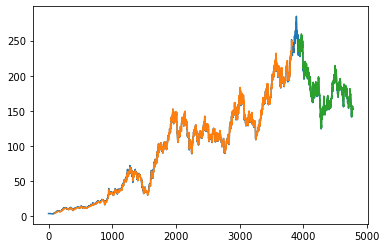

In [248]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [249]:
len(test_data)

956

In [250]:
x_input=test_data[856:].reshape(1,-1) # previous 100 data
x_input.shape


(1, 100)

In [251]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [252]:
temp_input

[0.6204610085810888,
 0.6325561581371678,
 0.6351855596557381,
 0.6318549916158708,
 0.625193855536136,
 0.6257197574908158,
 0.6246680077088703,
 0.6227397727115969,
 0.612222274892143,
 0.6071387905490332,
 0.5845261431735004,
 0.5913625438198524,
 0.5906613772985555,
 0.5862790594767427,
 0.5708533418807963,
 0.563841622540413,
 0.5606864273219909,
 0.5619134416705536,
 0.5727815227506559,
 0.5682239403622259,
 0.5594593588460143,
 0.5664710240589835,
 0.576637992745203,
 0.5803190899183048,
 0.5813708397002502,
 0.576637992745203,
 0.5776896883997343,
 0.5706780231867651,
 0.5612122751492566,
 0.550168875375123,
 0.534217309951911,
 0.5385995736463097,
 0.5475394738565525,
 0.5664710240589835,
 0.559985260800694,
 0.5633157747131474,
 0.580494408612336,
 0.5752356055751952,
 0.5689251068835228,
 0.5801438253516876,
 0.5871555446920709,
 0.5861037407827114,
 0.5876813925193366,
 0.5892589901285477,
 0.5847014077401176,
 0.5906613772985555,
 0.5866295886099772,
 0.5922389749077666,
 

In [253]:
# demonstrate prediction for next 10 days & refere univariate time series ipynb file to understand this
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5332833]
101
1 day input [0.63255616 0.63518556 0.63185499 0.62519386 0.62571976 0.62466801
 0.62273977 0.61222227 0.60713879 0.58452614 0.59136254 0.59066138
 0.58627906 0.57085334 0.56384162 0.56068643 0.56191344 0.57278152
 0.56822394 0.55945936 0.56647102 0.57663799 0.58031909 0.58137084
 0.57663799 0.57768969 0.57067802 0.56121228 0.55016888 0.53421731
 0.53859957 0.54753947 0.56647102 0.55998526 0.56331577 0.58049441
 0.57523561 0.56892511 0.58014383 0.58715554 0.58610374 0.58768139
 0.58925899 0.58470141 0.59066138 0.58662959 0.59223897 0.59311546
 0.59960122 0.62975149 0.61748102 0.62081159 0.61292344 0.60731411
 0.59644597 0.60398354 0.59872474 0.60468471 0.59872474 0.60363296
 0.60363296 0.59837421 0.58996016 0.5823335  0.58073722 0.58322032
 0.5798504  0.57080479 0.54402271 0.55555141 0.55572879 0.55058522
 0.54490953 0.53710549 0.52593154 0.532494   0.49152274 0.5184822
 0.51865958 0.5163538  0.51617648 0.50393827 0.49116805 0.50429302
 0.51475753 0.52628624 0.5349771  0

 0.54217666 0.54436821 0.54656488 0.54877156]
8 day output [[0.5509875]]
9 day input [0.60713879 0.58452614 0.59136254 0.59066138 0.58627906 0.57085334
 0.56384162 0.56068643 0.56191344 0.57278152 0.56822394 0.55945936
 0.56647102 0.57663799 0.58031909 0.58137084 0.57663799 0.57768969
 0.57067802 0.56121228 0.55016888 0.53421731 0.53859957 0.54753947
 0.56647102 0.55998526 0.56331577 0.58049441 0.57523561 0.56892511
 0.58014383 0.58715554 0.58610374 0.58768139 0.58925899 0.58470141
 0.59066138 0.58662959 0.59223897 0.59311546 0.59960122 0.62975149
 0.61748102 0.62081159 0.61292344 0.60731411 0.59644597 0.60398354
 0.59872474 0.60468471 0.59872474 0.60363296 0.60363296 0.59837421
 0.58996016 0.5823335  0.58073722 0.58322032 0.5798504  0.57080479
 0.54402271 0.55555141 0.55572879 0.55058522 0.54490953 0.53710549
 0.52593154 0.532494   0.49152274 0.5184822  0.51865958 0.5163538
 0.51617648 0.50393827 0.49116805 0.50429302 0.51475753 0.52628624
 0.5349771  0.53852439 0.53621867 0.54437746 

17 day output [[0.5711083]]
18 day input [0.57278152 0.56822394 0.55945936 0.56647102 0.57663799 0.58031909
 0.58137084 0.57663799 0.57768969 0.57067802 0.56121228 0.55016888
 0.53421731 0.53859957 0.54753947 0.56647102 0.55998526 0.56331577
 0.58049441 0.57523561 0.56892511 0.58014383 0.58715554 0.58610374
 0.58768139 0.58925899 0.58470141 0.59066138 0.58662959 0.59223897
 0.59311546 0.59960122 0.62975149 0.61748102 0.62081159 0.61292344
 0.60731411 0.59644597 0.60398354 0.59872474 0.60468471 0.59872474
 0.60363296 0.60363296 0.59837421 0.58996016 0.5823335  0.58073722
 0.58322032 0.5798504  0.57080479 0.54402271 0.55555141 0.55572879
 0.55058522 0.54490953 0.53710549 0.52593154 0.532494   0.49152274
 0.5184822  0.51865958 0.5163538  0.51617648 0.50393827 0.49116805
 0.50429302 0.51475753 0.52628624 0.5349771  0.53852439 0.53621867
 0.54437746 0.54437746 0.53923389 0.53923389 0.53781494 0.53692812
 0.53426765 0.52859201 0.52717306 0.53089773 0.53328329 0.53549886
 0.53775388 0.5399778

25 day output [[0.59027064]]
26 day input [0.57768969 0.57067802 0.56121228 0.55016888 0.53421731 0.53859957
 0.54753947 0.56647102 0.55998526 0.56331577 0.58049441 0.57523561
 0.56892511 0.58014383 0.58715554 0.58610374 0.58768139 0.58925899
 0.58470141 0.59066138 0.58662959 0.59223897 0.59311546 0.59960122
 0.62975149 0.61748102 0.62081159 0.61292344 0.60731411 0.59644597
 0.60398354 0.59872474 0.60468471 0.59872474 0.60363296 0.60363296
 0.59837421 0.58996016 0.5823335  0.58073722 0.58322032 0.5798504
 0.57080479 0.54402271 0.55555141 0.55572879 0.55058522 0.54490953
 0.53710549 0.52593154 0.532494   0.49152274 0.5184822  0.51865958
 0.5163538  0.51617648 0.50393827 0.49116805 0.50429302 0.51475753
 0.52628624 0.5349771  0.53852439 0.53621867 0.54437746 0.54437746
 0.53923389 0.53923389 0.53781494 0.53692812 0.53426765 0.52859201
 0.52717306 0.53089773 0.53328329 0.53549886 0.53775388 0.53997785
 0.54217666 0.54436821 0.54656488 0.54877156 0.55098748 0.55320901
 0.55543238 0.5576556

In [254]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [255]:
import matplotlib.pyplot as plt

In [256]:
len(df1)

4778

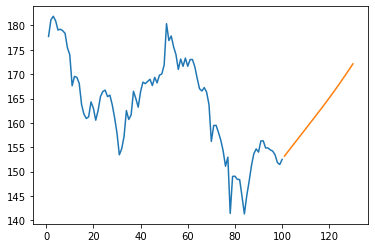

In [261]:
plt.plot(day_new,scaler.inverse_transform(df1[4678:])) #previous 100
plt.plot(day_pred,scaler.inverse_transform(lst_output))

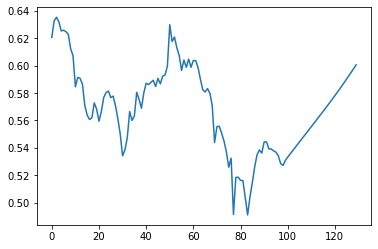

In [267]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4678:])